In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.DataFrame({

    "company":["google","google","google","google","google","google","abc pharma","abc pharma","abc pharma","abc pharma",
               "facebook","facebook","facebook","facebook","facebook","facebook"],

    "job":["sale_exective","sale_exective","buisness_manager","buisness_manager","computer programer","computer programer",
           "sale_exective","computer programer","buisness_manager","buisness_manager","sale_exective","sale_exective",
           "buisness_manager","buisness_manager","computer programer","computer programer"],

    "degree":["bachelor","master","bachelor","master","bachelor","master","master","bachelor","bachelor","master",
              "bachelor","master","bachelor","master","bachelor","master"] ,

    "salary_more_100k":[0,0,1,1,0,1,0,0,0,1,1,1,1,1,1,1]
})
df.to_csv("salary_tree.csv",index=False)


In [12]:
df.head()

,company,job,degree,salary_more_100k
0,google,sale_exective,bachelor,0
1,google,sale_exective,master,0
2,google,buisness_manager,bachelor,1
3,google,buisness_manager,master,1
4,google,computer programer,bachelor,0


make ind and dep varaible

In [13]:
inputs=df.drop("salary_more_100k",axis="columns")
inputs.head()

,company,job,degree
0,google,sale_exective,bachelor
1,google,sale_exective,master
2,google,buisness_manager,bachelor
3,google,buisness_manager,master
4,google,computer programer,bachelor


In [14]:
target=df["salary_more_100k"]

model just know nuemrical data or label data not know string 
we have three ind var create three diff label object

In [15]:
from sklearn.preprocessing import LabelEncoder
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()

now create three new coloumn for labeling above three column in same data frame

catogorical var has two type nomianl have no numerical order like compnay column 
ordinal have some order like degree bach < master 
for ordianl use labelencoder and for nomianl used onehotenocder of preprovessing 

In [16]:
inputs["company_n"]=le_company.fit_transform(inputs["company"])
inputs['job_n']=le_job.fit_transform(inputs['job'])
inputs['degree_n']=le_degree.fit_transform(inputs['degree'])
inputs.head(15)

,company,job,degree,company_n,job_n,degree_n
0,google,sale_exective,bachelor,2,2,0
1,google,sale_exective,master,2,2,1
2,google,buisness_manager,bachelor,2,0,0
3,google,buisness_manager,master,2,0,1
4,google,computer programer,bachelor,2,1,0
5,google,computer programer,master,2,1,1
6,abc pharma,sale_exective,master,0,2,1
7,abc pharma,computer programer,bachelor,0,1,0
8,abc pharma,buisness_manager,bachelor,0,0,0
9,abc pharma,buisness_manager,master,0,0,1


drop string column becuase we get alternate for them

In [17]:
inputs_n=inputs.drop(["company","job","degree"],axis="columns")
inputs_n.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [27]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(inputs_n,target)

DecisionTreeClassifier(criterion='entropy')

In [28]:
dt.score(inputs_n,target)

1.0

In [29]:
import joblib
joblib.dump(dt,"dec_tree_model")


['dec_tree_model']

to visualize tree to find root,decision and leaf node 

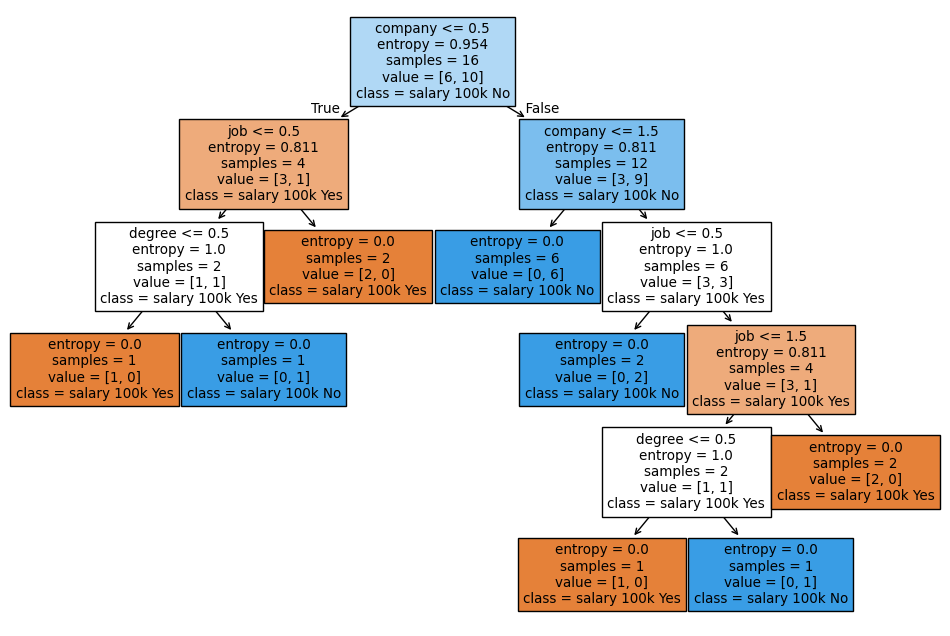

In [32]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dt,feature_names=["company","job","degree"],class_names=["salary 100k Yes","salary 100k No"],filled=True)
plt.show()

In [34]:
import numpy as np
#p1=available sample/total sample 
p1=np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]) #cat 1/10,2/10,3/10
p0=1-p1 #not cat 
H=-(p1)*np.log2(p1)-p0*np.log2(p0) #entropy formula 

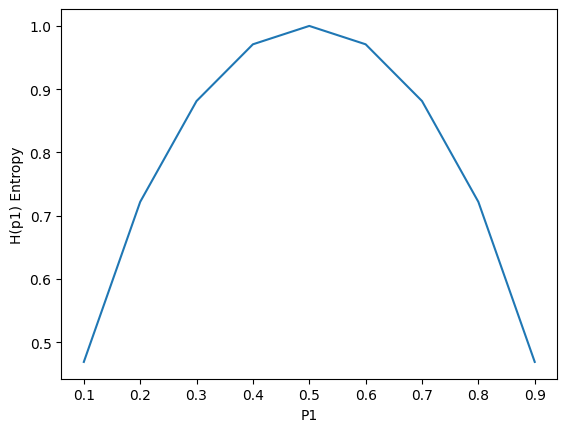

<Figure size 1200x800 with 0 Axes>

In [39]:
plt.plot(p1,H)
plt.xlabel("P1")
plt.ylabel("H(p1) Entropy")
plt.figure(figsize=(12,8))
plt.show()